# Ejemplo Pre-procesamiento: Filtrado, normalización y estandarización

## Tratamiento de señales 3-Virtual UdeA
### Paula Andrea Pérez Toro


##### Librerias

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.io.wavfile import read # libreria para lectura de archivos de audio
from IPython.display import Audio # para escuchar la senal

##### Datos

In [2]:
#Lectura de un archivo de audio wav

file_audio=('/home/paulaperezt/Documents/Master/UdeA/InstructorStudent/TTS3/Slides/Preprocesamiento/test.wav') # Ruta del archivo con la senal
fs, x=read(file_audio) # Cargar el archivo

## Filtrado

##### Graficando y escuchando señal de audio

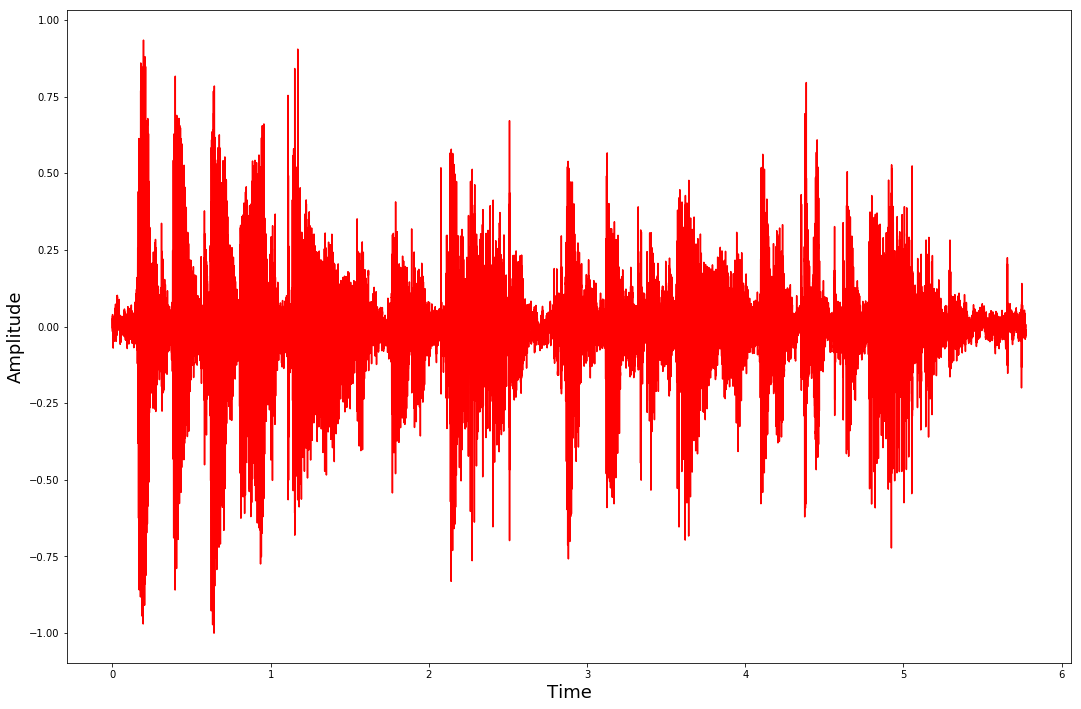

In [3]:

x_amp=x/float(max(abs(x))) # escala la amplitud de la senal
t=np.arange(0, float(len(x))/fs, 1.0/fs) # Vector de tiempo

plt.figure(figsize=(18,12))
plt.plot(t,x_amp, color='red') # Dibujar la grafica

# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.show() # Mostrar la grafica

Audio(x_amp, rate=fs) # para escuchar la senal, si se desea


##### Agregando ruido

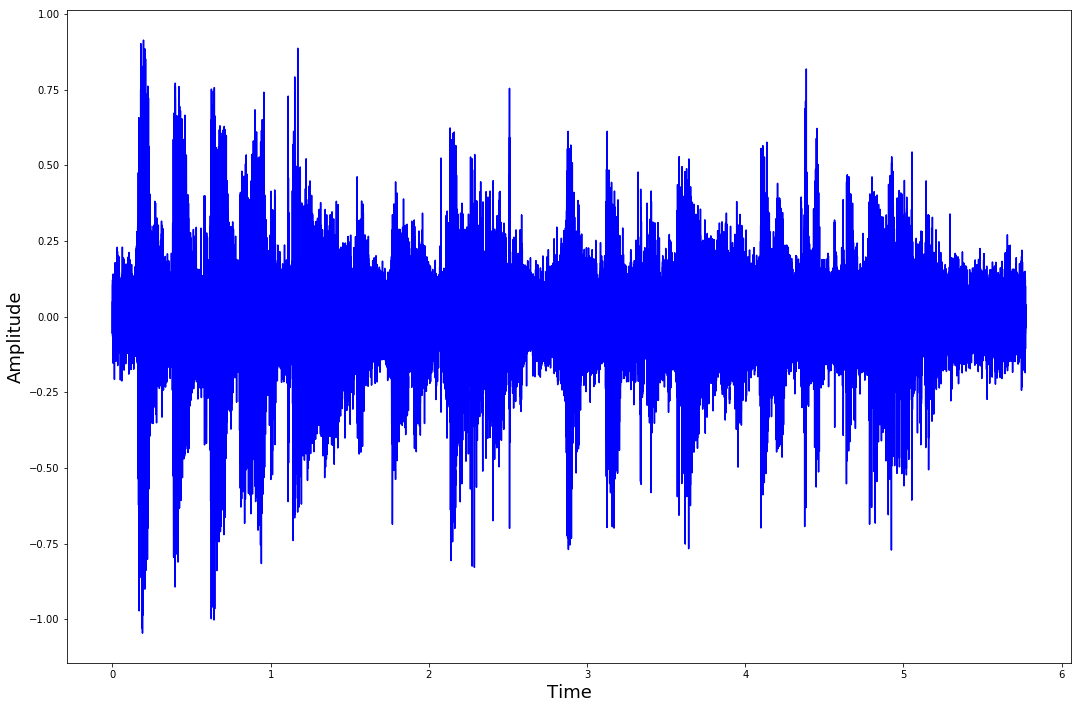

In [5]:
xn = x_amp + np.random.randn(len(t)) * 0.06


plt.figure(figsize=(18,12))
plt.plot(t,xn, color='blue') # Dibujar la grafica

# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.show() # Mostrar la grafica



Audio(xn, rate=fs) # para escuchar la senal, si se desea


##### Se grafica la señal normalizado frente a la ruidosa

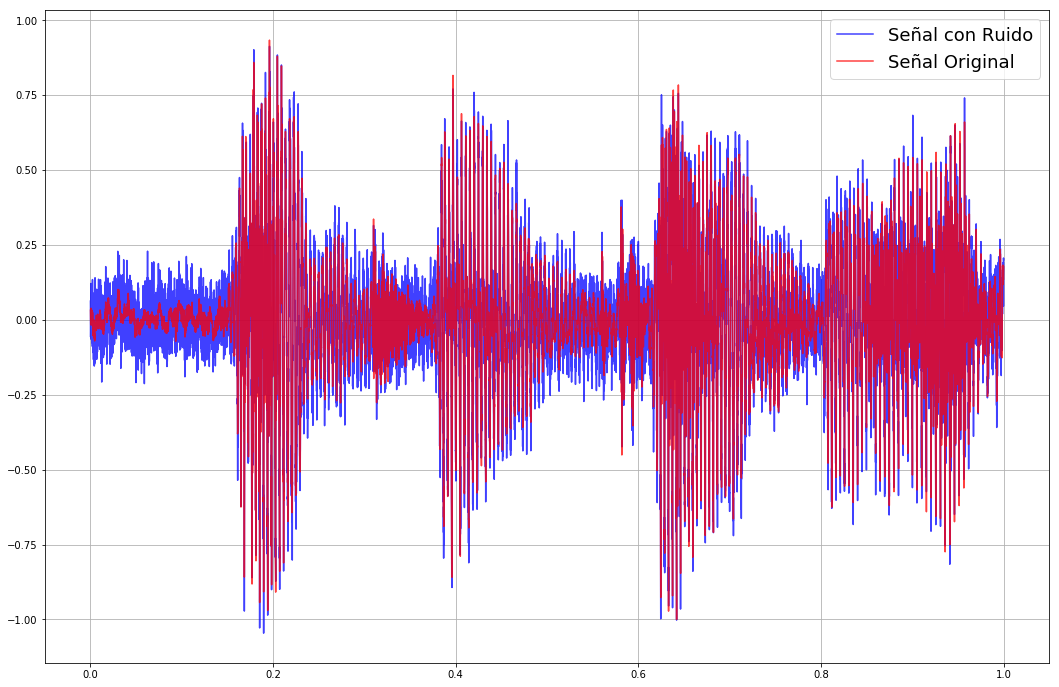

In [7]:
ni=0
nf=16000

plt.figure(figsize=(18,12))
plt.plot(t[ni:nf], xn[ni:nf], 'b',t[ni:nf], x_amp[ni:nf], 'red', alpha=0.75)
plt.legend(('Señal con Ruido', 'Señal Original'), loc='best', fontsize=18)
plt.grid(True)
plt.show()

##### Se obtiene el orden y el cutoff normalizado 2*(1/fs)*4000, 2*50/fs

In [8]:
orden,wn=signal.buttord(2*4000/fs, 2*50/fs,4,20, analog=False)
orden,wn

(1, 0.5653245661672263)

##### Se calculan los coeficientes del filtro butter

In [9]:
b, a = signal.butter(orden, wn)


##### lfilter_zi para escoger la condición inicial del filtro.

In [11]:
zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a, xn, zi=zi*xn[0])


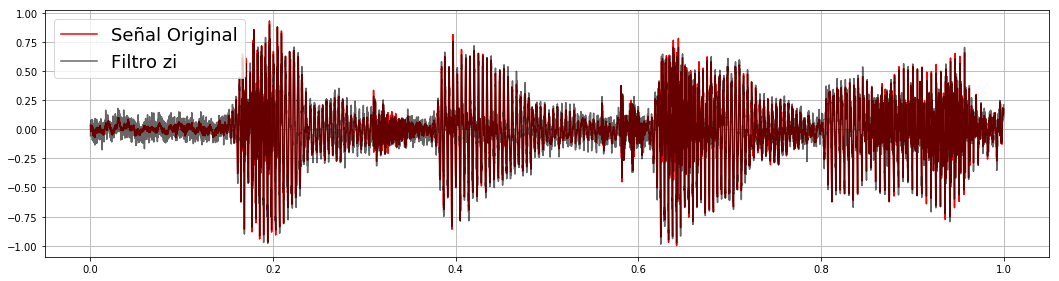

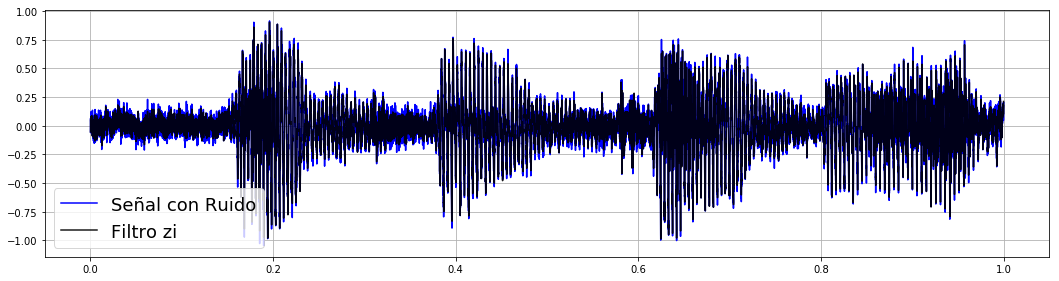

In [12]:

ni=0
nf=16000

plt.figure(figsize=(18,10))
plt.subplot(2, 1, 1)
plt.plot(t[ni:nf], x_amp[ni:nf], 'red')


plt.plot(t[ni:nf], z[ni:nf], '-', color='black', alpha=0.6)


plt.legend(( 'Señal Original', 'Filtro zi'), loc='best', fontsize=18)
plt.grid(True)
#plt.show()
plt.show()

plt.figure(figsize=(18,10))
plt.subplot(2, 1, 2)


plt.plot(t[ni:nf], xn[ni:nf], 'b')
plt.plot(t[ni:nf], z[ni:nf], '-', color='black', alpha=0.9)


plt.legend(('Señal con Ruido',  'Filtro zi'), loc='best', fontsize=18)
plt.grid(True)
plt.show()
Audio(z, rate=fs) # para escuchar la senal, si se desea


In [13]:
Audio(xn, rate=fs) # para escuchar la senal, si se desea


##### Se aplica el filtro de nuevo àra tener un resultado filtrado para que se filtre a un orden igual que filtfil (backward)

In [14]:
z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])


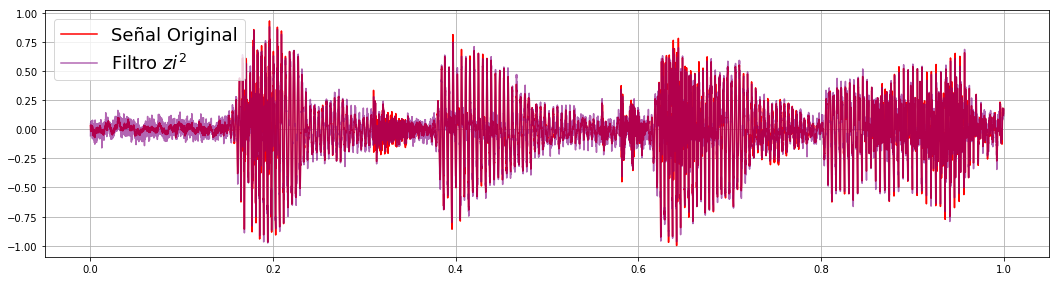

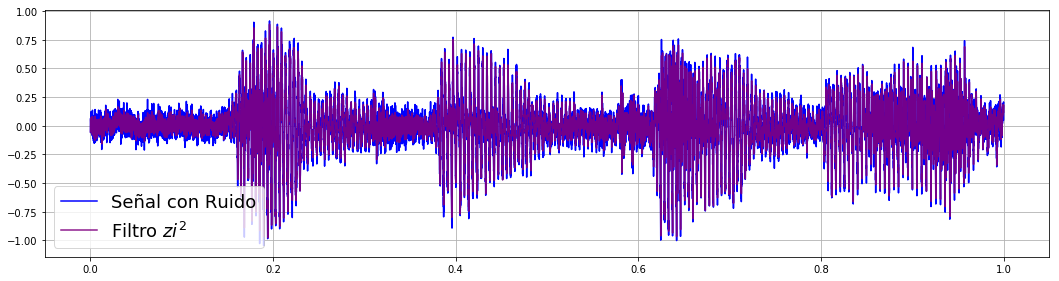

In [15]:

ni=0
nf=16000
plt.figure(figsize=(18,10))


plt.subplot(2, 1, 1)
#plt.subplot(1, 2, 1)
plt.plot(t[ni:nf], x_amp[ni:nf], 'red')


plt.plot(t[ni:nf], z2[ni:nf], '-', color='purple', alpha=0.6)


plt.legend(( 'Señal Original', 'Filtro $zi^{2}$'), loc='best', fontsize=18)
plt.grid(True)
#plt.show()

plt.show()

plt.figure(figsize=(18,10))

plt.subplot(2, 1, 2)
#plt.subplot(1, 2, 2)


plt.plot(t[ni:nf], xn[ni:nf], 'b')
plt.plot(t[ni:nf], z2[ni:nf], '-', color='purple', alpha=0.9)


plt.legend(('Señal con Ruido',  'Filtro $zi^{2}$'), loc='best', fontsize=18)
plt.grid(True)
plt.show()
Audio(z2, rate=fs) # para escuchar la senal, si se desea


In [41]:
Audio(xn, rate=fs) # para escuchar la senal, si se desea


##### Usando filtfil

In [16]:
y = signal.filtfilt(b, a, xn)


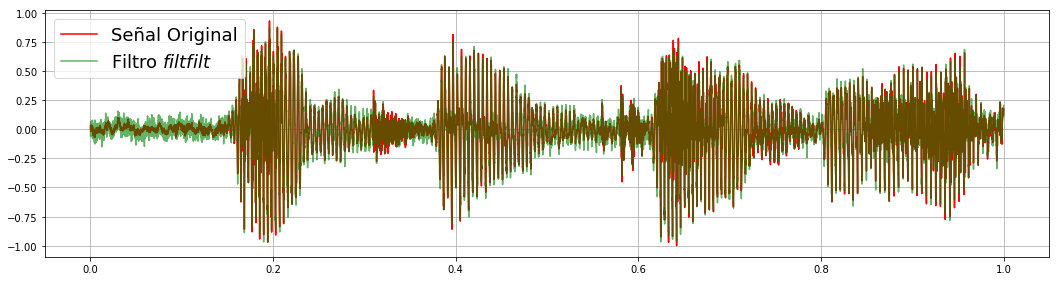

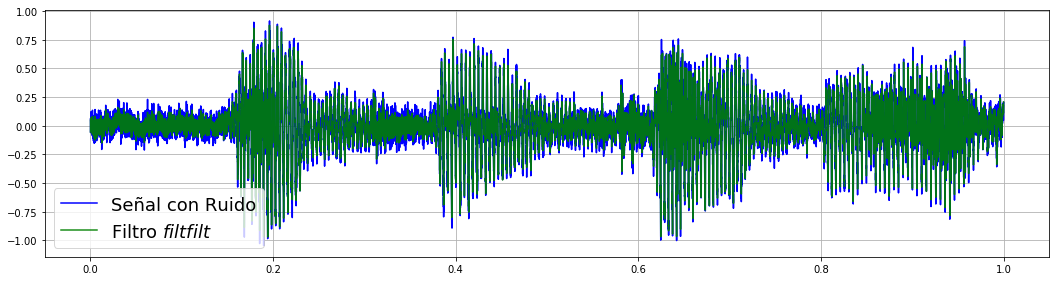

In [17]:
ni=0
nf=16000

plt.figure(figsize=(18,10))



plt.subplot(2, 1, 1)
#plt.subplot(1, 2, 2)
plt.plot(t[ni:nf], x_amp[ni:nf], 'red')


plt.plot(t[ni:nf], y[ni:nf], '-', color='green', alpha=0.6)


plt.legend(( 'Señal Original', 'Filtro $filtfilt$'), loc='best', fontsize=18)
plt.grid(True)



plt.show()

plt.figure(figsize=(18,10))
plt.subplot(2, 1, 2)
#plt.subplot(1, 2, 2)


plt.plot(t[ni:nf], xn[ni:nf], 'b')
plt.plot(t[ni:nf], y[ni:nf], '-', color='green', alpha=0.9)


plt.legend(('Señal con Ruido',  'Filtro $filtfilt$'), loc='best', fontsize=18)
plt.grid(True)
plt.show()
Audio(y, rate=fs) # para escuchar la senal, si se desea


In [44]:
Audio(xn, rate=fs) # para escuchar la senal, si se desea


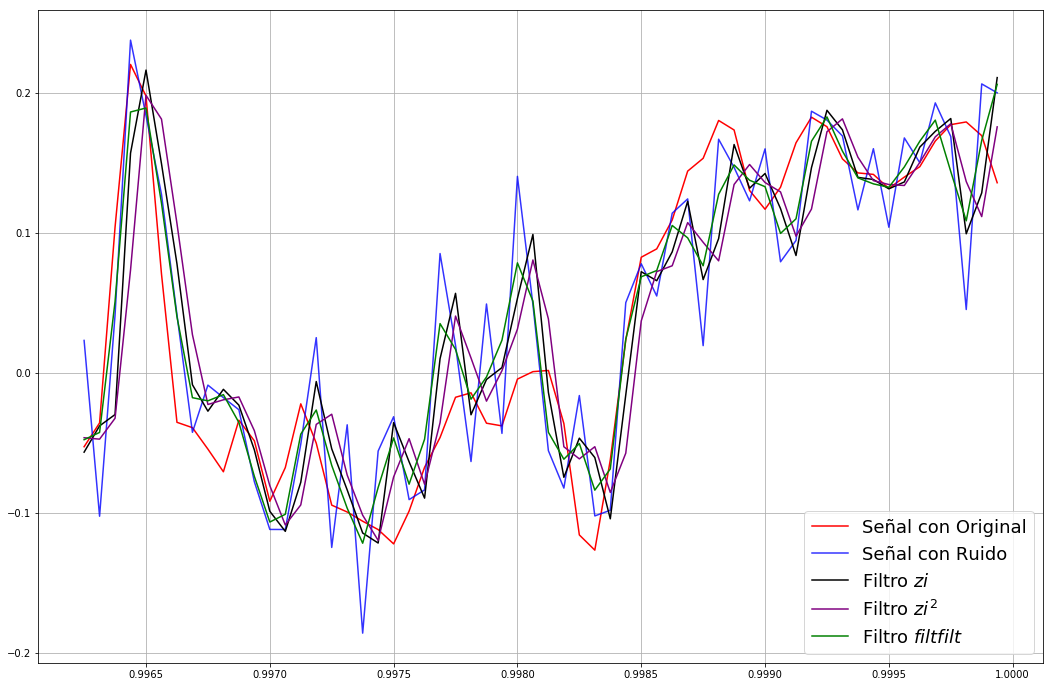

In [18]:
plt.figure(figsize=(18,12))

ni=15940
nf=16000
plt.plot(t[ni:nf], x_amp[ni:nf], 'red', alpha=1)
plt.plot(t[ni:nf], xn[ni:nf], 'b', alpha=0.8)
plt.plot(t[ni:nf], z[ni:nf], '-', color='black', alpha=1)

plt.plot(t[ni:nf], z2[ni:nf], '-', color='purple', alpha=1)

plt.plot(t[ni:nf], y[ni:nf], '-', color='green', alpha=1)


plt.legend(('Señal con Original','Señal con Ruido','Filtro $zi$', 'Filtro $zi^{2}$', 'Filtro $filtfilt$'), loc='best', fontsize=18)
plt.grid(True)
plt.show()

In [51]:
Audio(x, rate=fs)

In [52]:
Audio(xn, rate=fs) # para escuchar la senal, si se desea


In [53]:
Audio(z, rate=fs) # para escuchar la senal, si se desea

In [54]:
Audio(z2, rate=fs) # para escuchar la senal, si se desea

In [55]:
Audio(y, rate=fs) # para escuchar la senal, si se desea

## Normalización

In [20]:
from sklearn import preprocessing
import numpy as np

file_audio=('/home/paulaperezt/Documents/Master/UdeA/InstructorStudent/TTS3/Slides/Preprocesamiento/test.wav') # Ruta del archivo con la senal
fs, x=read(file_audio) # Cargar el archivo
# Normalize total_bedrooms column
x_array = np.array(x)
#Normalizacion
normalized_X = preprocessing.normalize([x])


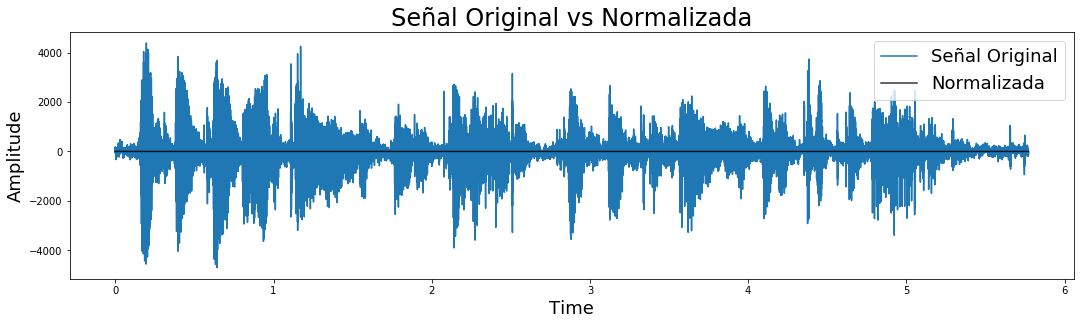

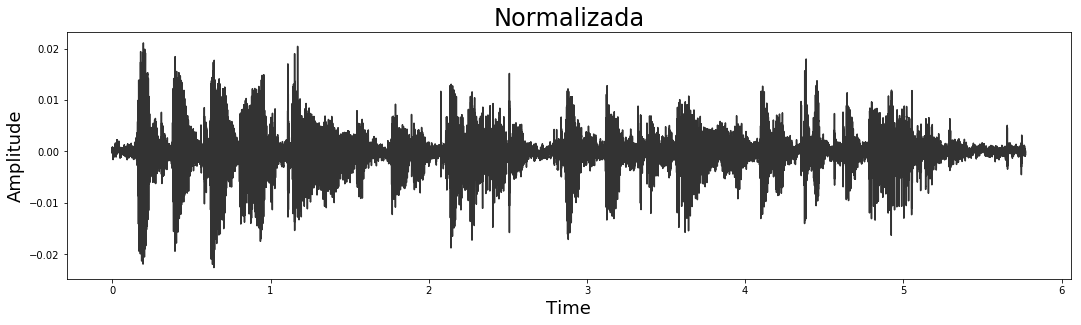

In [21]:


plt.figure(figsize=(18,10))


plt.subplot(2, 1, 1)
#plt.subplot(1, 2, 2)
plt.title('Señal Original vs Normalizada', fontsize=24)
plt.plot(t,x) # Dibujar la grafica
plt.plot(t,np.hstack(normalized_X), alpha=0.8, color='k') # Dibujar la grafica
plt.legend(['Señal Original','Normalizada'], fontsize=18)

# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y

plt.show()

plt.figure(figsize=(18,10))
plt.subplot(2, 1, 2)
#plt.subplot(1, 2, 2)
plt.title('Normalizada', fontsize=24)

plt.plot(t,np.hstack(normalized_X), alpha=0.8, color='k') # Dibujar la grafica

# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.show() # Mostrar la grafica



##### Estadarización

/home/paulaperezt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int16 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/paulaperezt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int16 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


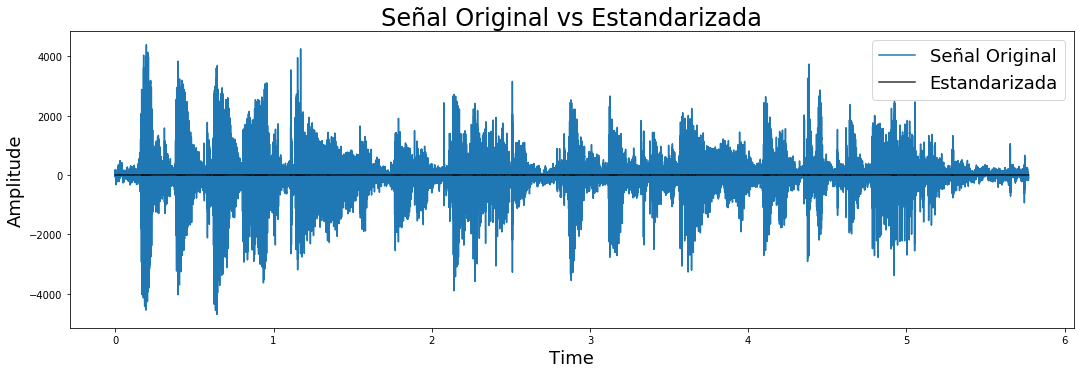

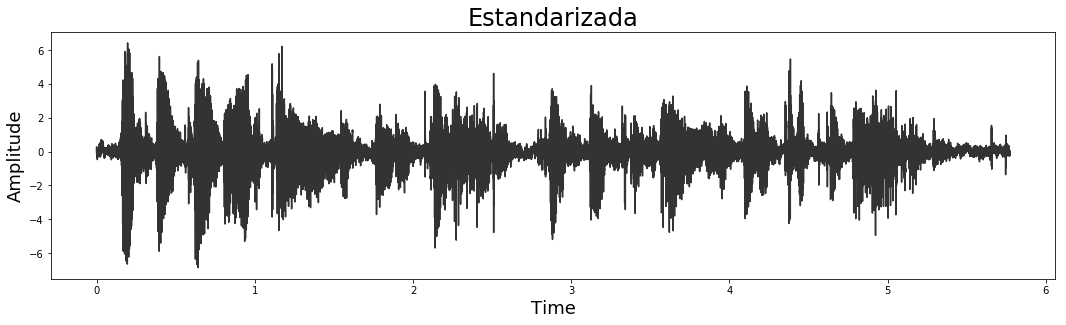

In [22]:
from sklearn import preprocessing



file_audio=('/home/paulaperezt/Documents/Master/UdeA/InstructorStudent/TTS3/Slides/Preprocesamiento/test.wav') # Ruta del archivo con la senal
fs, x=read(file_audio) # Cargar el archivo

x=np.vstack(x)
scaler = preprocessing.StandardScaler()# Fit your data on the scaler object
standar_X = scaler.fit(x)

standar_X = scaler.transform(x)



plt.figure(figsize=(18,12))


plt.subplot(2, 1, 1)
#plt.subplot(1, 2, 2)
plt.title('Señal Original vs Estandarizada', fontsize=24)
plt.plot(t,x) # Dibujar la grafica
plt.plot(t,np.hstack(standar_X), alpha=0.8, color='k') # Dibujar la grafica


plt.legend(['Señal Original','Estandarizada'], fontsize=18)

# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y

plt.show()

plt.figure(figsize=(18,10))

plt.subplot(2, 1, 2)
#plt.subplot(1, 2, 2)
plt.title('Estandarizada', fontsize=24)

plt.plot(t,np.hstack(standar_X), alpha=0.8, color='k') # Dibujar la grafica

# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y
plt.show() # Mostrar la grafica




##### Normalizada vs Estandarizada

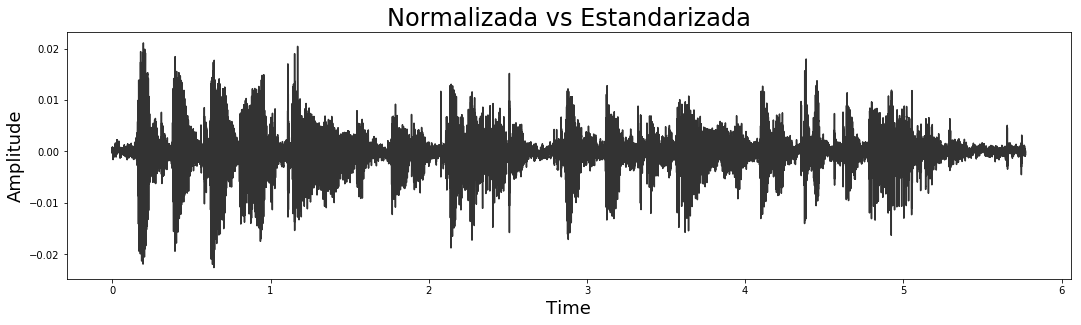

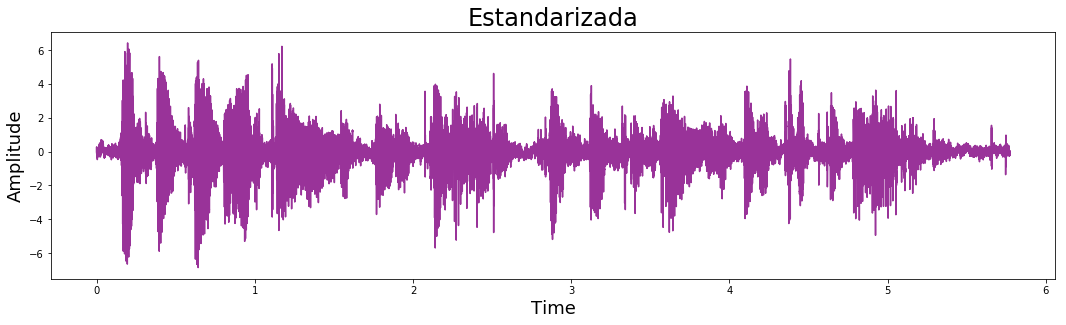

In [23]:
plt.figure(figsize=(18,10))



plt.subplot(2, 1, 1)
#plt.subplot(1, 2, 2)
plt.title('Normalizada vs Estandarizada', fontsize=24)
plt.plot(t,np.hstack(normalized_X), alpha=0.8, color='k') # Dibujar la grafica


#plt.legend(['Normalizada'], fontsize=18)

# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y

plt.show()

plt.figure(figsize=(18,10))

plt.subplot(2, 1, 2)
#plt.subplot(1, 2, 2)
plt.title('Estandarizada', fontsize=24)

plt.plot(t,np.hstack(standar_X), alpha=0.8, color='purple') # Dibujar la grafica
#plt.legend(['Estandarizada'], fontsize=18)

# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y


plt.show()




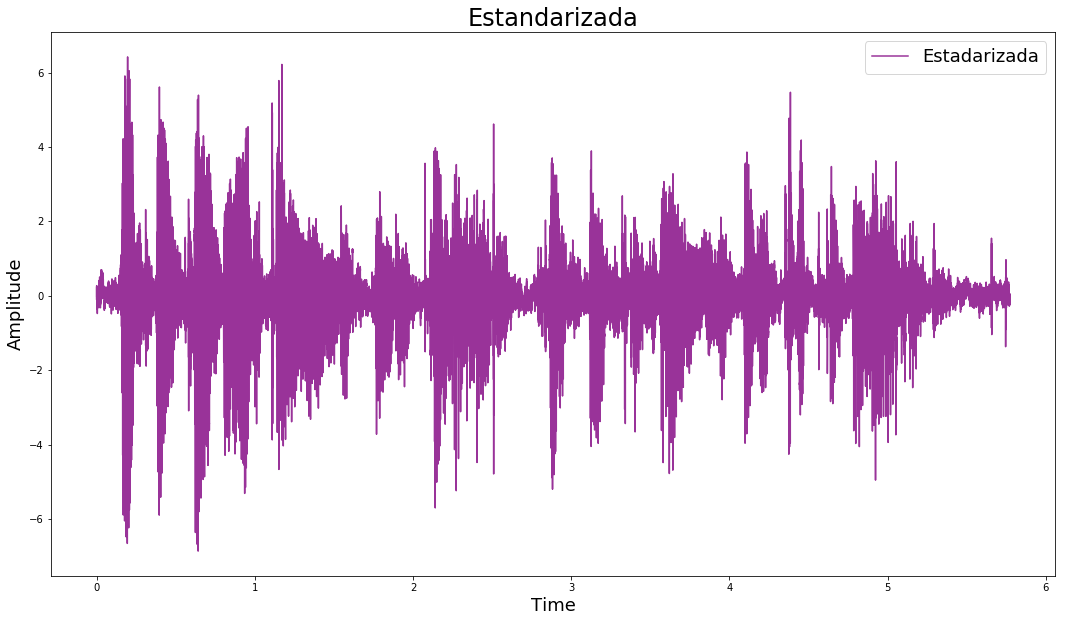

In [24]:
plt.figure(figsize=(18,10))
#plt.subplot(1, 2, 2)
plt.title('Estandarizada', fontsize=24)

plt.plot(t,np.hstack(standar_X), alpha=0.8, color='purple') # Dibujar la grafica
plt.legend(['Estadarizada'], fontsize=18)

# Los siguientes dos comandos dibujan las etiquetas de los ejes
plt.xlabel('Time',fontsize=18) # Etiqueta eje X
plt.ylabel('Amplitude',fontsize=18) # Etiqueta eje Y


plt.show() # Mostrar la grafica
